<a href="https://colab.research.google.com/github/kuma987/Section-1-Project/blob/main/%EB%B3%B4%EC%B6%A9%20%ED%95%99%EC%8A%B5/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 및 패키지 준비

In [ ]:
# 패키지 불러오기
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings(action='ignore')

from scipy import stats

plt.rc('font', family='NanumGothic')
%config InlineBackend.figure_format='retina'

from google.colab import drive

In [ ]:
# 한글 안 나올 경우 아래 코드 실행하고 런타인 재시작
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''
print()

In [ ]:
# 데이터 불러오기
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Codestates/N100/Project/data

/content/drive/MyDrive/Codestates/N100/Project/data


In [ ]:
game = pd.read_csv('vgames2_edited_2015.csv')

# 파이차트 글자 내용
- 함수 설정에 따라 표현하고자 하는 글자 내용 변경 가능

In [ ]:
genre = game.Genre.value_counts().reset_index(drop=False)
genre['Color'] = ['#DC143C', '#AFEEEE','#A0522D', '#7CFC00', '#EE82EE', '#7FFFD4', '#FFB6C1', '#6495ED', '#BC8F8F', '#FF8C00', '#006400', '#483D8B']
genre = genre.loc[:,['index','Color']]
genre.columns = ['Genre','Color']

In [ ]:
region = game.loc[:, ['Genre', 'NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']]

In [ ]:
region_group = region.groupby('Genre').sum()
region_group.columns = ['NA','EU','JP','Others']
region_groupT = region_group.T.reset_index(drop=False)
region_groupT.rename(columns={'index' : 'Region'},inplace=True)

In [ ]:
from pandas.api.types import CategoricalDtype # 범주형에 순서 부여하기 위한 메소드

region_melt = pd.melt(region_groupT, id_vars = 'Region', var_name = 'Genre', value_name='Sales')
region_melt['Region'] = region_melt['Region'].astype(CategoricalDtype(categories=['NA', 'EU', 'JP', 'Others'], ordered=True))
region_melt['Genre'] = region_melt['Genre'].astype('category')

In [ ]:
# NA
NA_top10 = game.sort_values('NA_Sales', ascending=False).head(10).reset_index(drop=True)
NA_top10_genre = NA_top10['Genre'].value_counts().reset_index()
NA_top10_genre.columns = ['Genre','Count']
NA_top10_genre['Color'] = np.nan
for i in range(len(NA_top10_genre)) :
  for j in range(len(genre)) :
    if NA_top10_genre['Genre'][i] == genre['Genre'][j] :
      NA_top10_genre['Color'][i] = genre['Color'][j]

In [ ]:
NA_top10_genre

,Genre,Count,Color
0,Platform,3,#6495ED
1,Sports,2,#AFEEEE
2,Misc,2,#A0522D
3,Shooter,1,#EE82EE
4,Puzzle,1,#483D8B
5,Racing,1,#FFB6C1


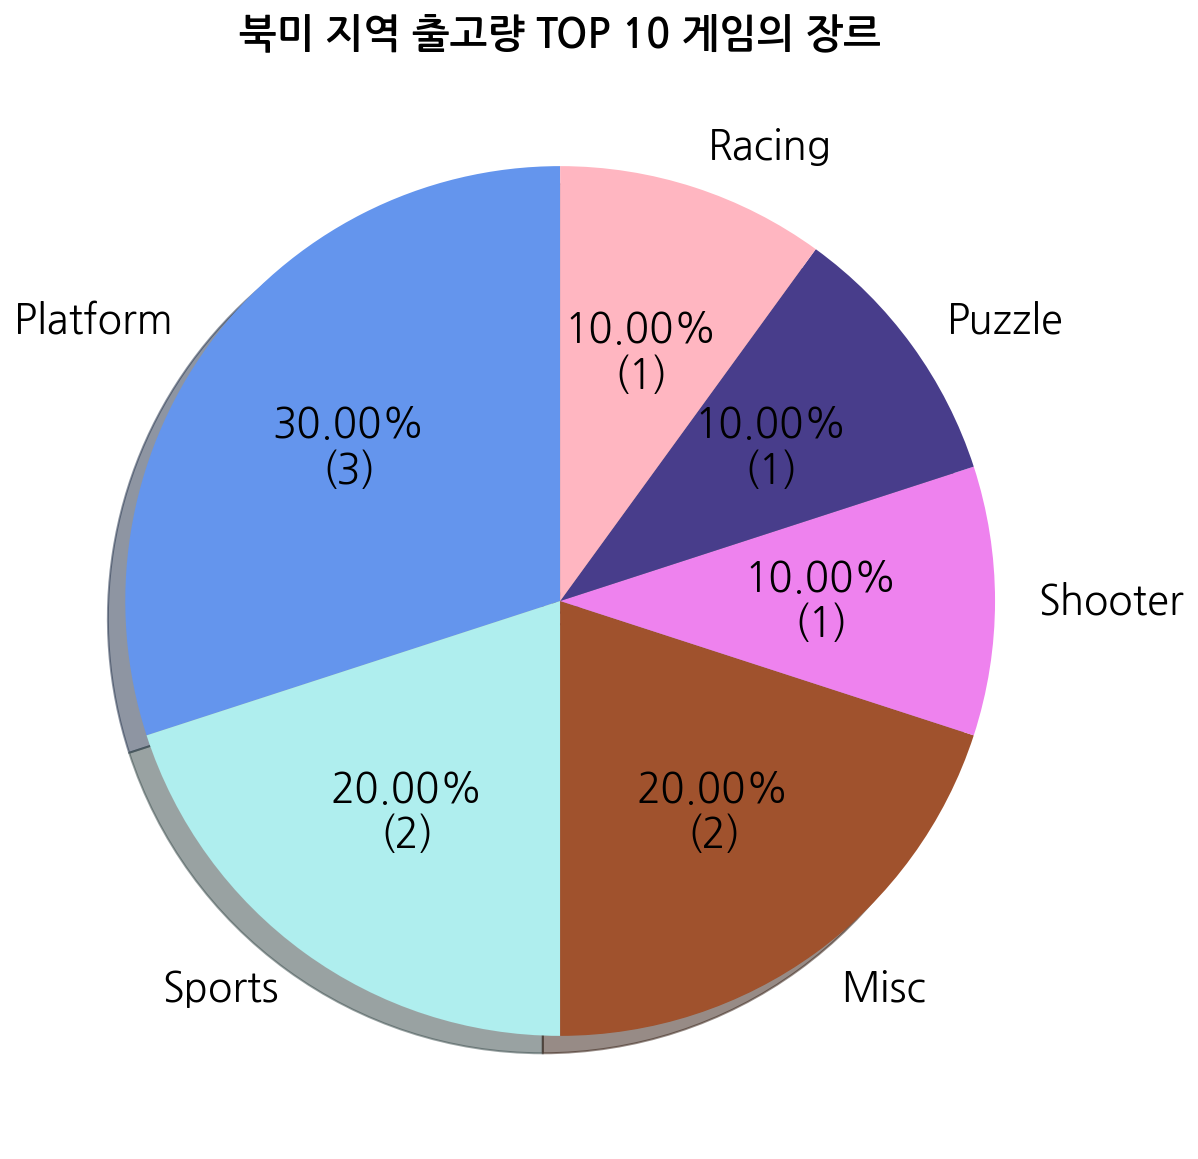

In [ ]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.2f}%\n({absolute:d})"

plt.figure(figsize=(15,10))

ratio = list(NA_top10_genre['Count'])
labels = list(NA_top10_genre['Genre'])
plt.pie(ratio, labels=labels, 
        autopct = lambda pct: func(pct, list(NA_top10_genre['Count'])),
        colors = NA_top10_genre['Color'],
        shadow=True,
        startangle=90,
        textprops = {'fontsize' : 20})
plt.title('북미 지역 출고량 TOP 10 게임의 장르', fontsize=20, fontweight='bold')

plt.show()

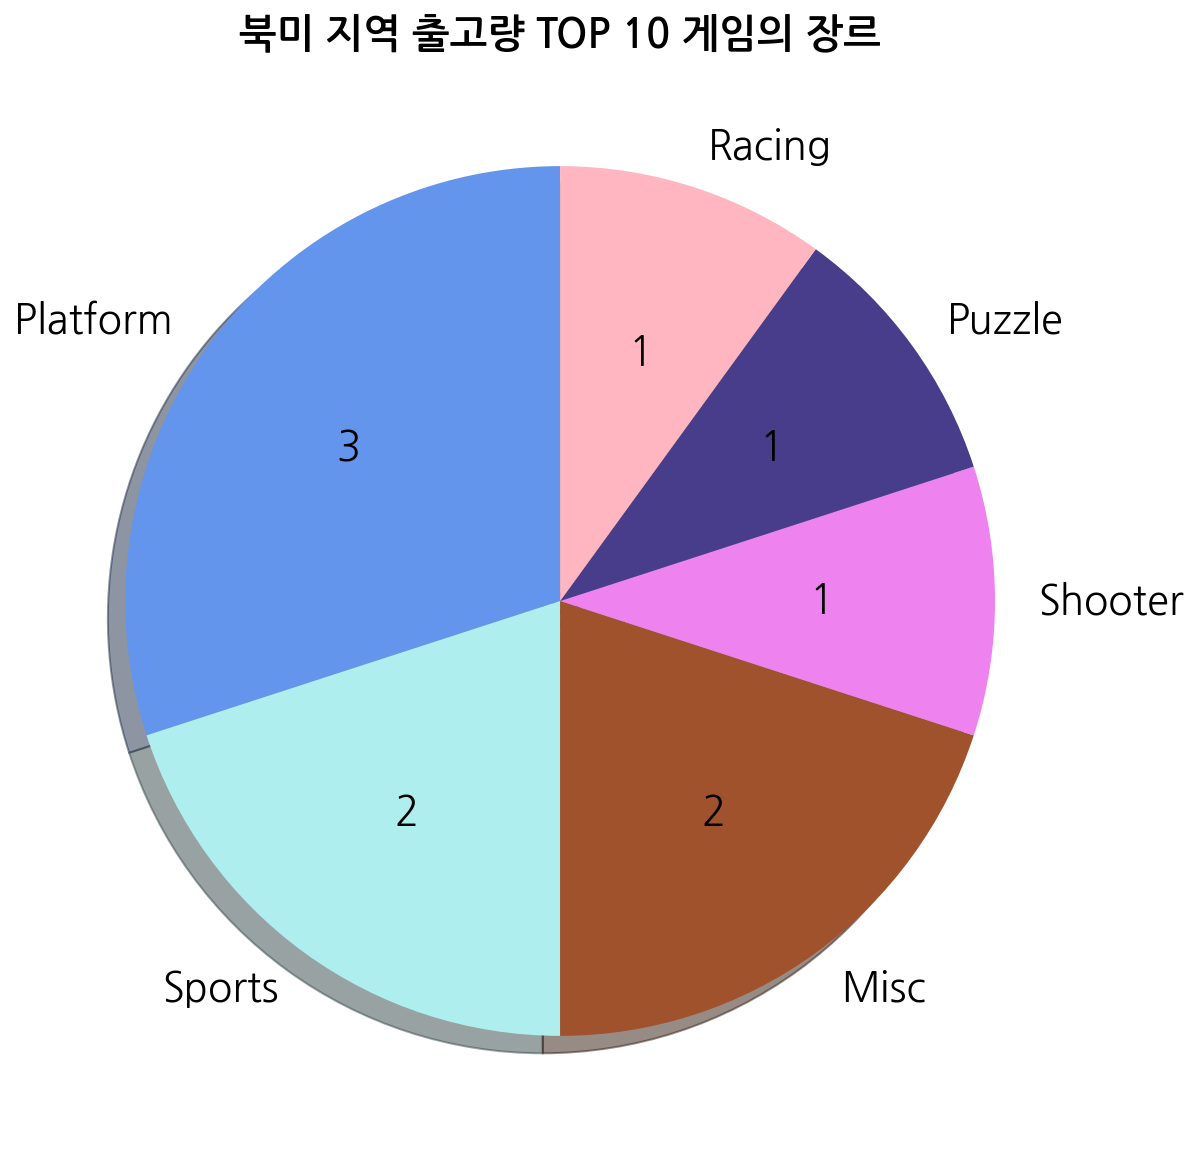

In [ ]:
def func(pct, allvals):
    absolute = pct/100*np.sum(allvals)
    return f"{round(absolute)}"

plt.figure(figsize=(15,10))

ratio = list(NA_top10_genre['Count'])
labels = list(NA_top10_genre['Genre'])
plt.pie(ratio, labels=labels, 
        autopct = lambda pct: func(pct, list(NA_top10_genre['Count'])),
        colors = NA_top10_genre['Color'],
        shadow=True,
        startangle=90,
        textprops = {'fontsize' : 20})
plt.title('북미 지역 출고량 TOP 10 게임의 장르', fontsize=20, fontweight='bold')

plt.show()

# 누적 막대 그래프

In [ ]:
sns.bar()

In [ ]:
genre_sales = game.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()

In [ ]:
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,853.39,508.61,150.81,182.47
Adventure,101.45,63.29,50.97,16.59
Fighting,219.14,98.85,86.51,35.73
Misc,394.75,208.10,103.37,72.63
Platform,444.68,199.77,130.42,51.15
Puzzle,121.58,50.47,56.24,12.44
Racing,355.91,234.68,56.31,76.43
Role-Playing,317.37,181.80,339.26,56.29
Shooter,567.72,302.75,37.57,99.48


## 값

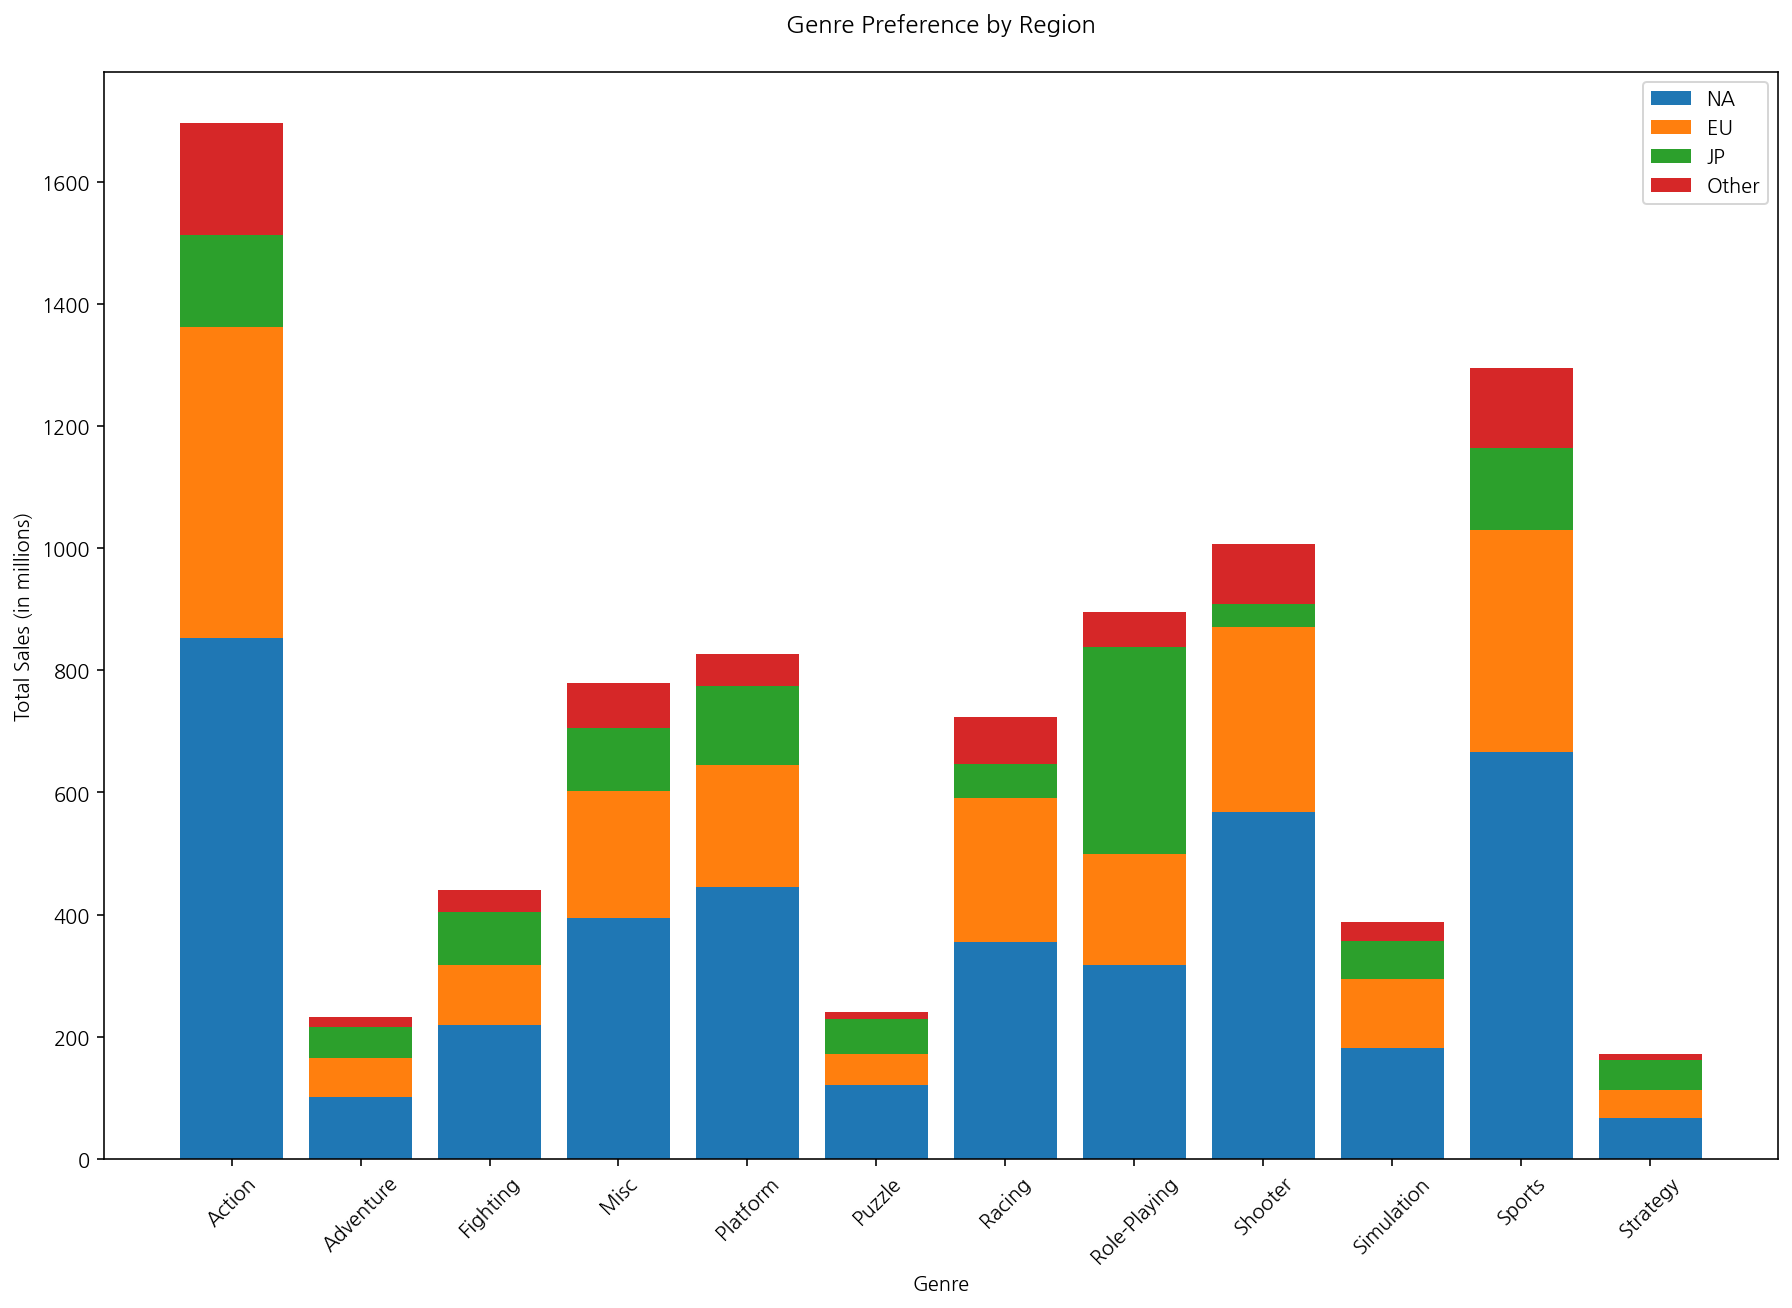

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.bar(genre_sales.index, genre_sales['NA_Sales'], label='NA')
ax.bar(genre_sales.index, genre_sales['EU_Sales'], bottom=genre_sales['NA_Sales'], label='EU')
ax.bar(genre_sales.index, genre_sales['JP_Sales'], bottom=genre_sales['NA_Sales']+genre_sales['EU_Sales'], label='JP')
ax.bar(genre_sales.index, genre_sales['Other_Sales'], bottom=genre_sales['NA_Sales']+genre_sales['EU_Sales']+genre_sales['JP_Sales'], label='Other')

ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (in millions)')
ax.legend()

plt.xticks(rotation=45)
plt.title('Genre Preference by Region', pad=20)


plt.show()

## 비율

In [ ]:
genre_sales_prop = genre_sales.div(genre_sales.sum(axis=1), axis=0)
genre_sales_prop

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.503392,0.300015,0.088959,0.107634
Adventure,0.436720,0.272449,0.219415,0.071416
Fighting,0.497785,0.224542,0.196511,0.081162
Misc,0.506837,0.267189,0.132721,0.093253
Platform,0.538340,0.241846,0.157890,0.061923
Puzzle,0.505047,0.209654,0.233623,0.051676
Racing,0.492044,0.324444,0.077848,0.105664
Role-Playing,0.354714,0.203192,0.379180,0.062914
Shooter,0.563483,0.300490,0.037290,0.098737


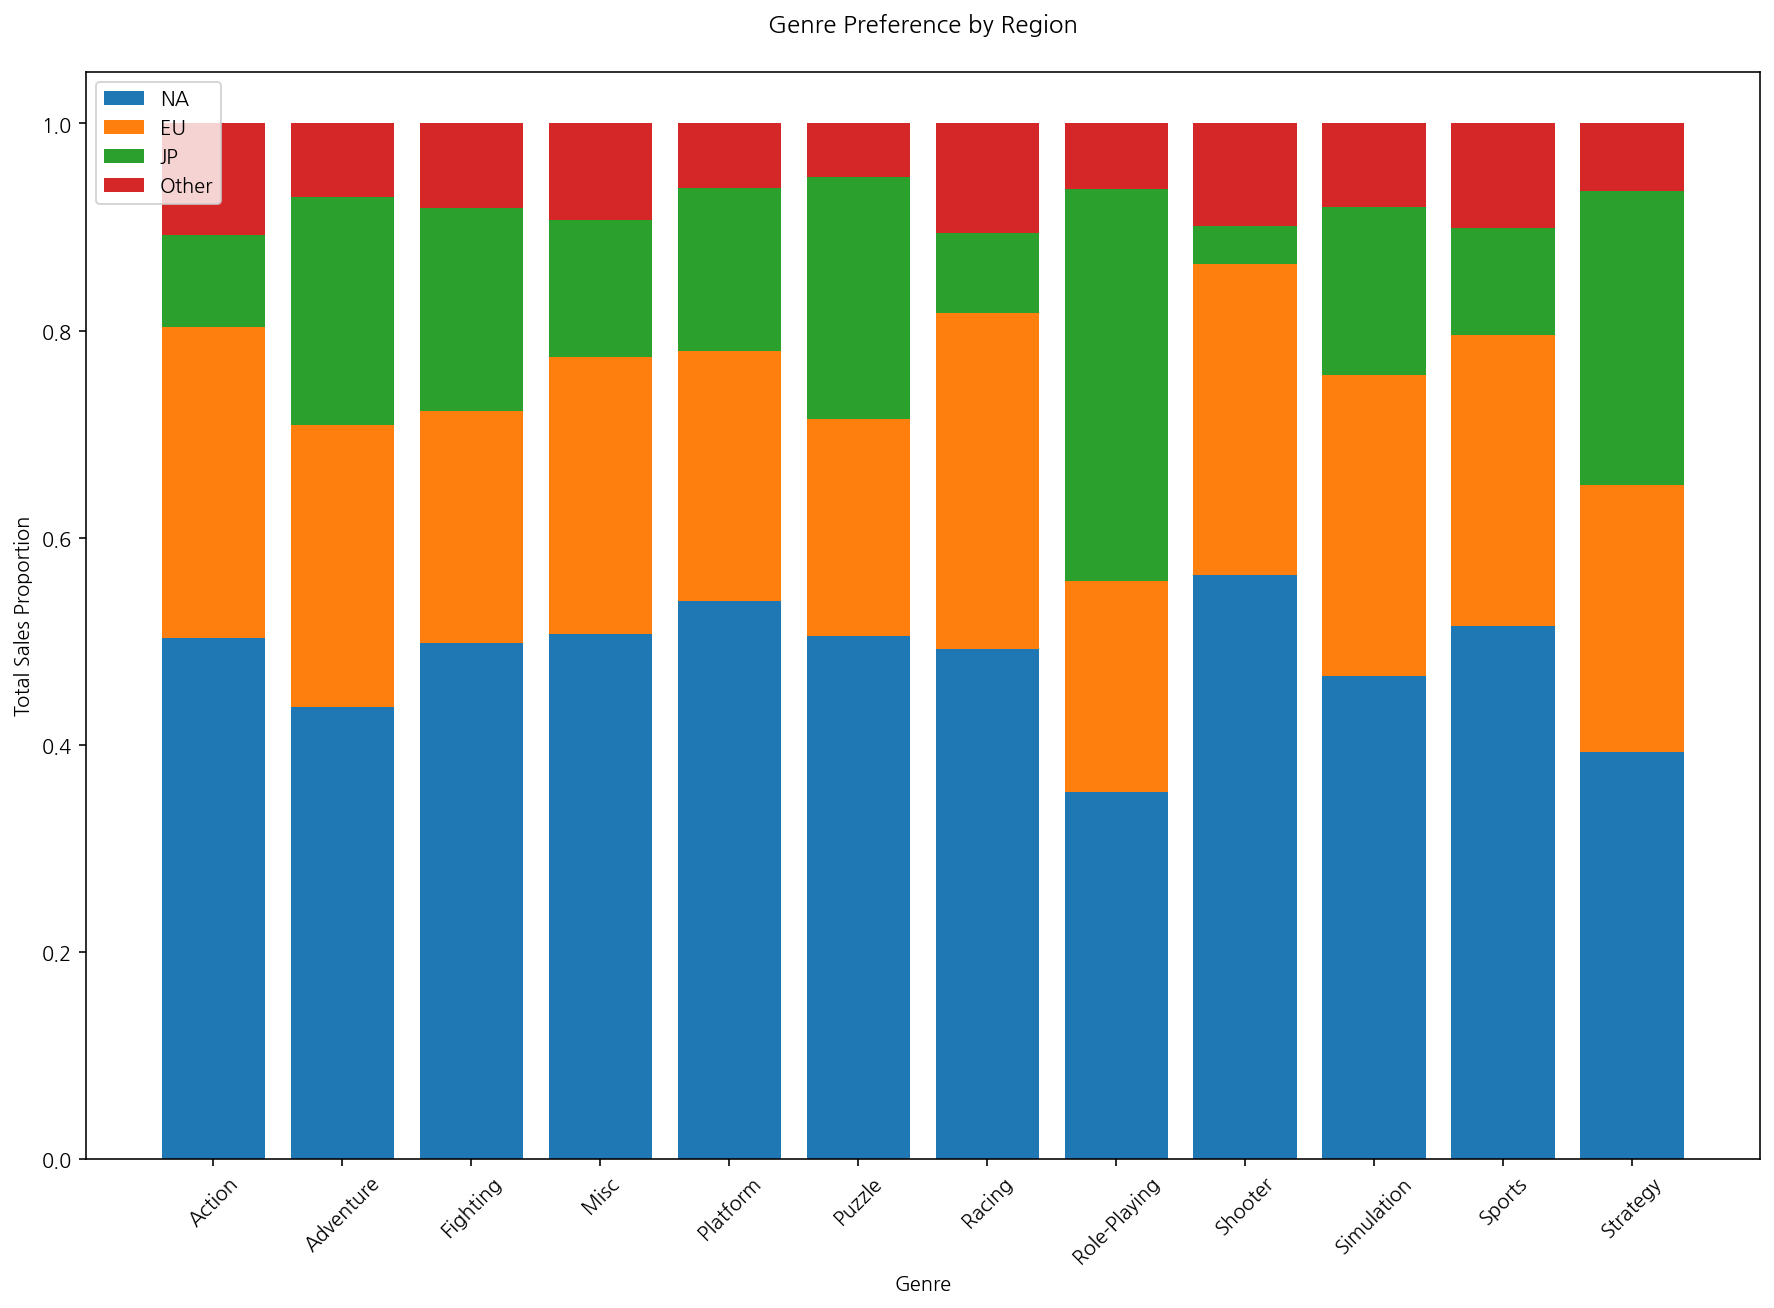

In [ ]:
# stacked bar 그래프 그리기
fig, ax = plt.subplots(figsize = (15,10))
ax.bar(genre_sales_prop.index, genre_sales_prop['NA_Sales'], label='NA')
ax.bar(genre_sales_prop.index, genre_sales_prop['EU_Sales'], bottom=genre_sales_prop['NA_Sales'], label='EU')
ax.bar(genre_sales_prop.index, genre_sales_prop['JP_Sales'], bottom=genre_sales_prop['NA_Sales']+genre_sales_prop['EU_Sales'], label='JP')
ax.bar(genre_sales_prop.index, genre_sales_prop['Other_Sales'], bottom=genre_sales_prop['NA_Sales']+genre_sales_prop['EU_Sales']+genre_sales_prop['JP_Sales'], label='Other')

ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales Proportion')
ax.legend()

plt.xticks(rotation=45)
plt.title('Genre Preference by Region', pad=20)


plt.show()